<a href="https://colab.research.google.com/github/finerbrighterlighter/myanmar_covid19/blob/master/situ_repo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from google.colab import files
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

This data is manually extracted from situation reports from [MOHS](https://mohs.gov.mm/Main/content/publication/2019-ncov), updated every few days.
This notebook will run exclusively on situation reports, not the daily announcements.    
It aims to track 
- the number of quarantine centers, 
- number of people at quarantine centers, 
- number of people under investigation   
__per State or Admininstrative Region.__

In [505]:
data = "https://raw.githubusercontent.com/finerbrighterlighter/myanmar_covid19/master/community_qua.csv"
df_w = pd.read_csv(data, names=["A","B","C","D","E","F"])
df_w

,A,B,C,D,E,F
date,4/4/20,5/4/20,7/4/20,9/4/20,10/4/20,11/4/20
Kachin,3480,3480,4883,5281,5447,5761
Kayar,496,496,370,141,89,76
Kayin,2402,2402,2746,2811,3101,3101
Chin,0,0,40,45,45,46
Mon,7674,8597,8724,4728,4728,2670
Rakhine,245,245,331,447,664,846
Shan (S),2262,2262,3329,2602,2897,2510
Shan (N),5957,5957,3489,1034,1074,1269
Shan (E),4160,4160,233,1104,1104,1214


I entered the csv file in wide format ( which is weirdly long ) for easier data updating.  
Row index [0] is the date row.  
Row index [1:17] is number of people in quarantine center.  
Row index [18] is an empty row.  
Row index [19:35] is number of quarantine centers in a region.  
Row index [37] is an empty row.   
Row index [38:] is number of people under investigation in each region.

In [506]:
df=df_w.T.reset_index(drop=True)
df["date"] = pd.to_datetime(df["date"].values, dayfirst=True, utc=False).tz_localize("Asia/Yangon")
df

,date,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw,NaN,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw,NaN,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw
0,2020-04-04 00:00:00+06:30,3480,496,2402,0,7674,245,2262,5957,4160,5281,5337,7399,8373,2644,2235,0,667,NaN,152,19,25,16,435,9,256,61,590,1231,804,74,911,26,317,317,5,NaN,14,32,26,8,7,16,33,49,34,26,88,28,52,228,18,5,16
1,2020-04-05 00:00:00+06:30,3480,496,2402,0,8597,245,2262,5957,4160,5281,5995,12546,8867,2644,2768,0,799,NaN,152,19,25,16,476,9,256,61,590,1231,883,72,996,26,317,317,5,NaN,14,33,28,8,8,16,33,52,37,29,92,31,55,258,20,6,18
2,2020-04-07 00:00:00+06:30,4883,370,2746,40,8724,331,3329,3489,233,11871,6577,12546,8989,3412,2786,3635,809,NaN,214,17,35,17,479,17,284,164,12,1239,933,73,1040,79,391,25,5,NaN,14,33,28,8,10,20,33,55,41,29,98,34,60,298,20,7,19
3,2020-04-09 00:00:00+06:30,5281,141,2811,45,4728,447,2602,1034,1104,19090,6735,13980,9440,3405,2470,1278,1059,NaN,238,17,35,17,484,76,284,268,21,6889,933,73,1025,81,416,228,6,NaN,14,35,30,8,14,20,33,55,44,30,105,35,63,335,22,7,20
4,2020-04-10 00:00:00+06:30,5447,89,3101,45,4728,664,2897,1074,1104,19913,6735,13980,8575,3066,2470,1144,1040,NaN,263,17,35,17,484,109,284,268,21,6889,933,73,996,81,416,228,6,NaN,14,35,30,8,18,21,33,57,46,30,107,37,78,373,22,7,20
5,2020-04-11 00:00:00+06:30,5761,76,3101,46,2670,846,2510,1269,1214,20696,5972,13980,8575,2763,2470,1137,1022,NaN,268,17,35,17,484,129,284,268,26,6889,933,73,996,81,416,228,6,NaN,14,35,32,8,18,21,33,59,46,30,112,39,79,406,26,7,21


May be it is just me but, I feel more comfortable plotting in long format.  
So, __Transpose__.  
Only after this, I start splicing the csv file into respective dataframes.

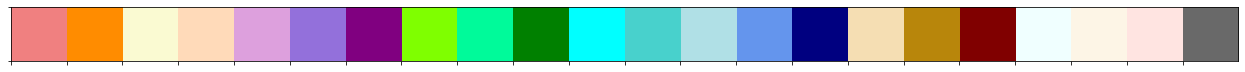

In [507]:
color_plan = ["lightcoral",
          "darkorange","lightgoldenrodyellow","peachpuff",
          "plum","mediumpurple","purple",
          "chartreuse","mediumspringgreen","green",
          "aqua","mediumturquoise",
          "powderblue","cornflowerblue","navy",
          "wheat","darkgoldenrod","maroon",
          "azure","oldlace","mistyrose","dimgray"]
sns.palplot(sns.color_palette(color_plan))


In [508]:
regions = list(df)

for i in range(1,18,1):
  df[regions[i]]=df[regions[i]].astype(int)

regions = regions[1:18]
regions

['Kachin',
 'Kayar',
 'Kayin',
 'Chin',
 'Mon',
 'Rakhine',
 'Shan (S)',
 'Shan (N)',
 'Shan (E)',
 'Sagaing',
 'Mandalay',
 'Magway',
 'Bago',
 'Yangon',
 'Ayeyarwaddy',
 'Tanintharyi',
 'Naypyitaw']

In [509]:
days = pd.DataFrame(columns=["ndays","date"])

days["ndays"] = np.arange(len(pd.date_range(start=df.date.min(), end=pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon"))))
days.loc[0,"date"]=df.date.min()
for i in range(1,len(days)):
    days.loc[i,"date"] = days.loc[i-1,"date"] + pd.Timedelta(days=1)
    i=i+1
days["date"] = pd.to_datetime(days["date"])
days.drop("ndays", axis=1 , inplace=True)
days

,date
0,2020-04-04 00:00:00+06:30
1,2020-04-05 00:00:00+06:30
2,2020-04-06 00:00:00+06:30
3,2020-04-07 00:00:00+06:30
4,2020-04-08 00:00:00+06:30
5,2020-04-09 00:00:00+06:30
6,2020-04-10 00:00:00+06:30
7,2020-04-11 00:00:00+06:30


# Number of quarantined people per region

In [510]:
qua_ppl_df = df.iloc[:, 0:18].reset_index(drop=True)
qua_ppl_df

,date,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw
0,2020-04-04 00:00:00+06:30,3480,496,2402,0,7674,245,2262,5957,4160,5281,5337,7399,8373,2644,2235,0,667
1,2020-04-05 00:00:00+06:30,3480,496,2402,0,8597,245,2262,5957,4160,5281,5995,12546,8867,2644,2768,0,799
2,2020-04-07 00:00:00+06:30,4883,370,2746,40,8724,331,3329,3489,233,11871,6577,12546,8989,3412,2786,3635,809
3,2020-04-09 00:00:00+06:30,5281,141,2811,45,4728,447,2602,1034,1104,19090,6735,13980,9440,3405,2470,1278,1059
4,2020-04-10 00:00:00+06:30,5447,89,3101,45,4728,664,2897,1074,1104,19913,6735,13980,8575,3066,2470,1144,1040
5,2020-04-11 00:00:00+06:30,5761,76,3101,46,2670,846,2510,1269,1214,20696,5972,13980,8575,2763,2470,1137,1022


In [511]:
qua_ppl_df=days.merge(qua_ppl_df,indicator=False,how='left')
qua_ppl_df.fillna(method='ffill', inplace=True)
qua_ppl_df["total"]=qua_ppl_df[regions].sum(axis = 1)
qua_ppl_df["avg"]=qua_ppl_df[regions].agg("mean", axis="columns")  
qua_ppl_df

,date,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw,total,avg
0,2020-04-04 00:00:00+06:30,3480.0,496.0,2402.0,0.0,7674.0,245.0,2262.0,5957.0,4160.0,5281.0,5337.0,7399.0,8373.0,2644.0,2235.0,0.0,667.0,58612.0,3447.764706
1,2020-04-05 00:00:00+06:30,3480.0,496.0,2402.0,0.0,8597.0,245.0,2262.0,5957.0,4160.0,5281.0,5995.0,12546.0,8867.0,2644.0,2768.0,0.0,799.0,66499.0,3911.705882
2,2020-04-06 00:00:00+06:30,3480.0,496.0,2402.0,0.0,8597.0,245.0,2262.0,5957.0,4160.0,5281.0,5995.0,12546.0,8867.0,2644.0,2768.0,0.0,799.0,66499.0,3911.705882
3,2020-04-07 00:00:00+06:30,4883.0,370.0,2746.0,40.0,8724.0,331.0,3329.0,3489.0,233.0,11871.0,6577.0,12546.0,8989.0,3412.0,2786.0,3635.0,809.0,74770.0,4398.235294
4,2020-04-08 00:00:00+06:30,4883.0,370.0,2746.0,40.0,8724.0,331.0,3329.0,3489.0,233.0,11871.0,6577.0,12546.0,8989.0,3412.0,2786.0,3635.0,809.0,74770.0,4398.235294
5,2020-04-09 00:00:00+06:30,5281.0,141.0,2811.0,45.0,4728.0,447.0,2602.0,1034.0,1104.0,19090.0,6735.0,13980.0,9440.0,3405.0,2470.0,1278.0,1059.0,75650.0,4450.000000
6,2020-04-10 00:00:00+06:30,5447.0,89.0,3101.0,45.0,4728.0,664.0,2897.0,1074.0,1104.0,19913.0,6735.0,13980.0,8575.0,3066.0,2470.0,1144.0,1040.0,76072.0,4474.823529
7,2020-04-11 00:00:00+06:30,5761.0,76.0,3101.0,46.0,2670.0,846.0,2510.0,1269.0,1214.0,20696.0,5972.0,13980.0,8575.0,2763.0,2470.0,1137.0,1022.0,74108.0,4359.294118


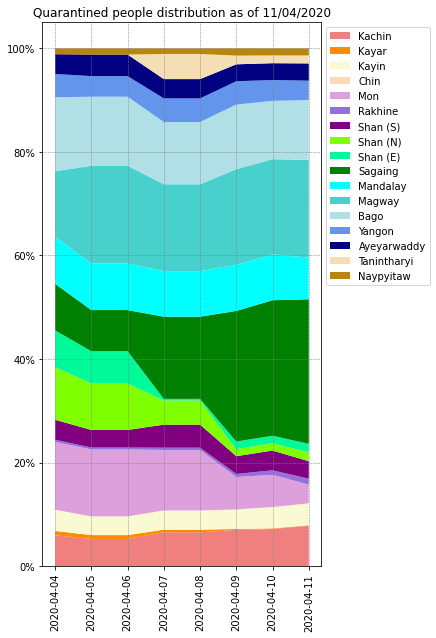

In [512]:
fig, ax = plt.subplots(figsize=(5,10))
ax.grid(linestyle='--', linewidth='0.5', color='gray')

plt.xticks(fontsize=10, rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

stacks = []
for i in range(0,17,1):
  stacks.append(qua_ppl_df[regions[i]]/qua_ppl_df["total"])

plt.stackplot(qua_ppl_df["date"],stacks, labels=regions, colors=sns.color_palette(color_plan))

plt.title("Quarantined people distribution as of "+str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d/%m/%Y")))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

qua_ppl_dis = str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y"))+"_qua_ppl_dis.svg"
plt.savefig(qua_ppl_dis, bbox_inches = "tight")
plt.show()
files.download(qua_ppl_dis)

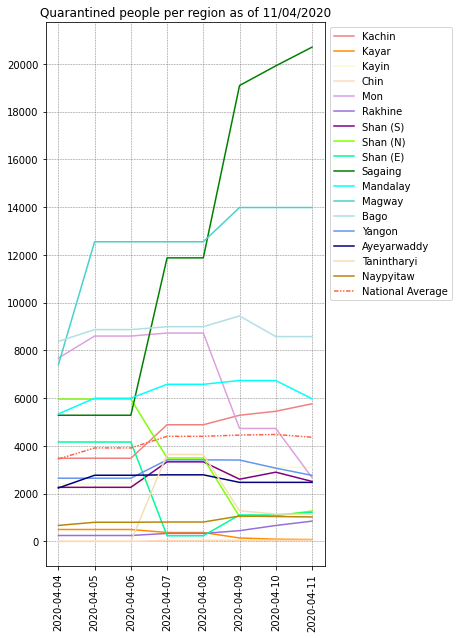

In [513]:
fig, ax = plt.subplots(figsize=(5,10))
ax.grid(linestyle='--', linewidth='0.5', color='gray')

plt.xticks(fontsize=10, rotation=90)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2000))

for i in range(0,17,1):
  plt.plot(qua_ppl_df["date"],qua_ppl_df[regions[i]], label=regions[i], color=color_plan[i])

plt.plot(qua_ppl_df["date"],qua_ppl_df["avg"], label="National Average", linestyle=(0, (3, 1, 1, 1, 1, 1)), color="tomato")

plt.title("Quarantined people per region as of "+str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d/%m/%Y")))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

qua_ppl_reg = str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y"))+"_qua_ppl_reg.svg"
plt.savefig(qua_ppl_reg, bbox_inches = "tight")
plt.show()
files.download(qua_ppl_reg)

# Number of quarantine centers

In [514]:
qua_cen_df = df.iloc[: , 19:36].reset_index(drop=True)
qua_cen_df.insert(loc=0, column="date", value=df.iloc[:, 0])
qua_cen_df

,date,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw
0,2020-04-04 00:00:00+06:30,152,19,25,16,435,9,256,61,590,1231,804,74,911,26,317,317,5
1,2020-04-05 00:00:00+06:30,152,19,25,16,476,9,256,61,590,1231,883,72,996,26,317,317,5
2,2020-04-07 00:00:00+06:30,214,17,35,17,479,17,284,164,12,1239,933,73,1040,79,391,25,5
3,2020-04-09 00:00:00+06:30,238,17,35,17,484,76,284,268,21,6889,933,73,1025,81,416,228,6
4,2020-04-10 00:00:00+06:30,263,17,35,17,484,109,284,268,21,6889,933,73,996,81,416,228,6
5,2020-04-11 00:00:00+06:30,268,17,35,17,484,129,284,268,26,6889,933,73,996,81,416,228,6


In [515]:
qua_cen_df=days.merge(qua_cen_df,indicator=False,how='left')
qua_cen_df.fillna(method='ffill', inplace=True)
qua_cen_df["total"]=qua_cen_df[regions].sum(axis = 1) 
qua_cen_df["avg"]=qua_cen_df[regions].agg("mean", axis="columns") 
qua_cen_df

,date,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw,total,avg
0,2020-04-04 00:00:00+06:30,152.0,19.0,25.0,16.0,435.0,9.0,256.0,61.0,590.0,1231.0,804.0,74.0,911.0,26.0,317.0,317.0,5.0,5248.0,308.705882
1,2020-04-05 00:00:00+06:30,152.0,19.0,25.0,16.0,476.0,9.0,256.0,61.0,590.0,1231.0,883.0,72.0,996.0,26.0,317.0,317.0,5.0,5451.0,320.647059
2,2020-04-06 00:00:00+06:30,152.0,19.0,25.0,16.0,476.0,9.0,256.0,61.0,590.0,1231.0,883.0,72.0,996.0,26.0,317.0,317.0,5.0,5451.0,320.647059
3,2020-04-07 00:00:00+06:30,214.0,17.0,35.0,17.0,479.0,17.0,284.0,164.0,12.0,1239.0,933.0,73.0,1040.0,79.0,391.0,25.0,5.0,5024.0,295.529412
4,2020-04-08 00:00:00+06:30,214.0,17.0,35.0,17.0,479.0,17.0,284.0,164.0,12.0,1239.0,933.0,73.0,1040.0,79.0,391.0,25.0,5.0,5024.0,295.529412
5,2020-04-09 00:00:00+06:30,238.0,17.0,35.0,17.0,484.0,76.0,284.0,268.0,21.0,6889.0,933.0,73.0,1025.0,81.0,416.0,228.0,6.0,11091.0,652.411765
6,2020-04-10 00:00:00+06:30,263.0,17.0,35.0,17.0,484.0,109.0,284.0,268.0,21.0,6889.0,933.0,73.0,996.0,81.0,416.0,228.0,6.0,11120.0,654.117647
7,2020-04-11 00:00:00+06:30,268.0,17.0,35.0,17.0,484.0,129.0,284.0,268.0,26.0,6889.0,933.0,73.0,996.0,81.0,416.0,228.0,6.0,11150.0,655.882353


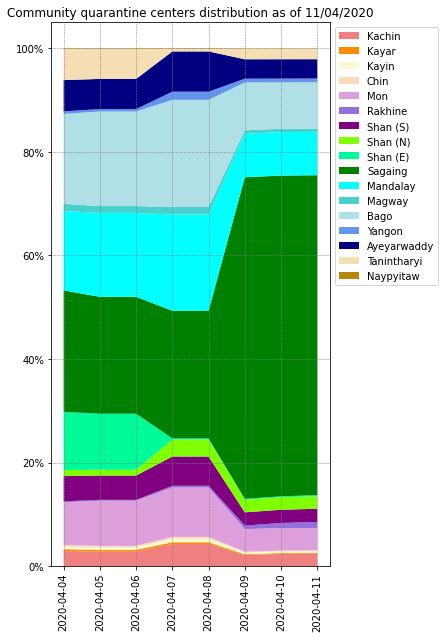

In [516]:
fig, ax = plt.subplots(figsize=(5,10))
ax.grid(linestyle='--', linewidth='0.5', color='gray')

plt.xticks(fontsize=10, rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

stacks = []
for i in range(0,17,1):
  stacks.append(qua_cen_df[regions[i]]/qua_cen_df["total"])

plt.stackplot(qua_cen_df["date"],stacks, labels=regions, colors=sns.color_palette(color_plan))

plt.title("Community quarantine centers distribution as of "+str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d/%m/%Y")))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

qua_cen_dis = str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y"))+"_qua_cen_dis.svg"
plt.savefig(qua_cen_dis, bbox_inches = "tight")
plt.show()
files.download(qua_cen_dis)

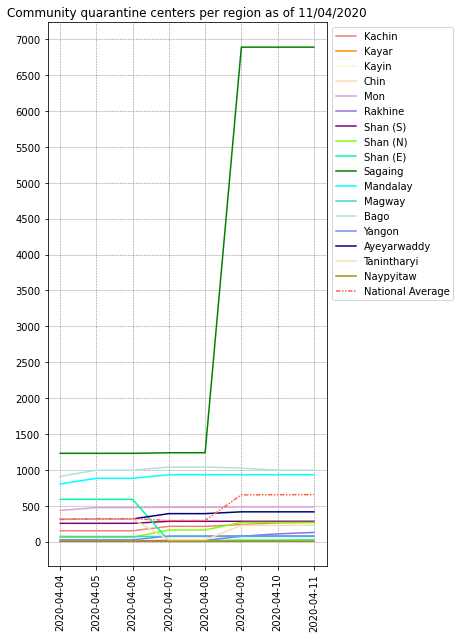

In [517]:
fig, ax = plt.subplots(figsize=(5,10))
ax.grid(linestyle='--', linewidth='0.5', color='gray')

plt.xticks(fontsize=10, rotation=90)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(500))

for i in range(0,17,1):
  plt.plot(qua_cen_df["date"],qua_cen_df[regions[i]], label=regions[i], color=color_plan[i])

plt.plot(qua_cen_df["date"],qua_cen_df["avg"], label="National Average", linestyle=(0, (3, 1, 1, 1, 1, 1)), color="tomato")

plt.title("Community quarantine centers per region as of "+str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d/%m/%Y")))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

qua_cen_reg = str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y"))+"_qua_cen_reg.svg"
plt.savefig(qua_cen_reg, bbox_inches = "tight")
plt.show()
files.download(qua_cen_reg)

# Number of PUI per region

In [518]:
pui_sr_df = df.iloc[: , 37:].reset_index(drop=True)
pui_sr_df.insert(loc=0, column="date", value=df.iloc[:, 0])
pui_sr_df

,date,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw
0,2020-04-04 00:00:00+06:30,14,32,26,8,7,16,33,49,34,26,88,28,52,228,18,5,16
1,2020-04-05 00:00:00+06:30,14,33,28,8,8,16,33,52,37,29,92,31,55,258,20,6,18
2,2020-04-07 00:00:00+06:30,14,33,28,8,10,20,33,55,41,29,98,34,60,298,20,7,19
3,2020-04-09 00:00:00+06:30,14,35,30,8,14,20,33,55,44,30,105,35,63,335,22,7,20
4,2020-04-10 00:00:00+06:30,14,35,30,8,18,21,33,57,46,30,107,37,78,373,22,7,20
5,2020-04-11 00:00:00+06:30,14,35,32,8,18,21,33,59,46,30,112,39,79,406,26,7,21


In [519]:
pui_sr_df=days.merge(pui_sr_df,indicator=False,how='left')
pui_sr_df.fillna(method='ffill', inplace=True)
pui_sr_df["total"]=pui_sr_df[regions].sum(axis = 1)
pui_sr_df["avg"]=pui_sr_df[regions].agg("mean", axis="columns") 
pui_sr_df

,date,Kachin,Kayar,Kayin,Chin,Mon,Rakhine,Shan (S),Shan (N),Shan (E),Sagaing,Mandalay,Magway,Bago,Yangon,Ayeyarwaddy,Tanintharyi,Naypyitaw,total,avg
0,2020-04-04 00:00:00+06:30,14.0,32.0,26.0,8.0,7.0,16.0,33.0,49.0,34.0,26.0,88.0,28.0,52.0,228.0,18.0,5.0,16.0,680.0,40.000000
1,2020-04-05 00:00:00+06:30,14.0,33.0,28.0,8.0,8.0,16.0,33.0,52.0,37.0,29.0,92.0,31.0,55.0,258.0,20.0,6.0,18.0,738.0,43.411765
2,2020-04-06 00:00:00+06:30,14.0,33.0,28.0,8.0,8.0,16.0,33.0,52.0,37.0,29.0,92.0,31.0,55.0,258.0,20.0,6.0,18.0,738.0,43.411765
3,2020-04-07 00:00:00+06:30,14.0,33.0,28.0,8.0,10.0,20.0,33.0,55.0,41.0,29.0,98.0,34.0,60.0,298.0,20.0,7.0,19.0,807.0,47.470588
4,2020-04-08 00:00:00+06:30,14.0,33.0,28.0,8.0,10.0,20.0,33.0,55.0,41.0,29.0,98.0,34.0,60.0,298.0,20.0,7.0,19.0,807.0,47.470588
5,2020-04-09 00:00:00+06:30,14.0,35.0,30.0,8.0,14.0,20.0,33.0,55.0,44.0,30.0,105.0,35.0,63.0,335.0,22.0,7.0,20.0,870.0,51.176471
6,2020-04-10 00:00:00+06:30,14.0,35.0,30.0,8.0,18.0,21.0,33.0,57.0,46.0,30.0,107.0,37.0,78.0,373.0,22.0,7.0,20.0,936.0,55.058824
7,2020-04-11 00:00:00+06:30,14.0,35.0,32.0,8.0,18.0,21.0,33.0,59.0,46.0,30.0,112.0,39.0,79.0,406.0,26.0,7.0,21.0,986.0,58.000000


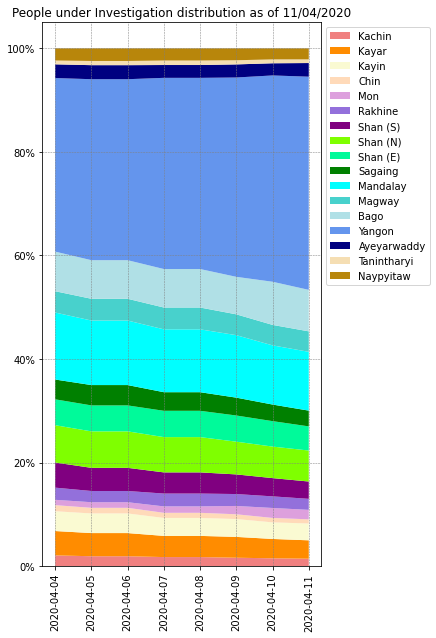

In [520]:
fig, ax = plt.subplots(figsize=(5,10))
ax.grid(linestyle='--', linewidth='0.5', color='gray')

plt.xticks(fontsize=10, rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

stacks = []
for i in range(0,17,1):
  stacks.append(pui_sr_df[regions[i]]/pui_sr_df["total"])

plt.stackplot(pui_sr_df["date"],stacks, labels=regions, colors=sns.color_palette(color_plan))

plt.title("People under Investigation distribution as of "+str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d/%m/%Y")))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

pui_dis = str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y"))+"_pui_dis.svg"
plt.savefig(pui_dis, bbox_inches = "tight")
plt.show()
files.download(pui_dis)

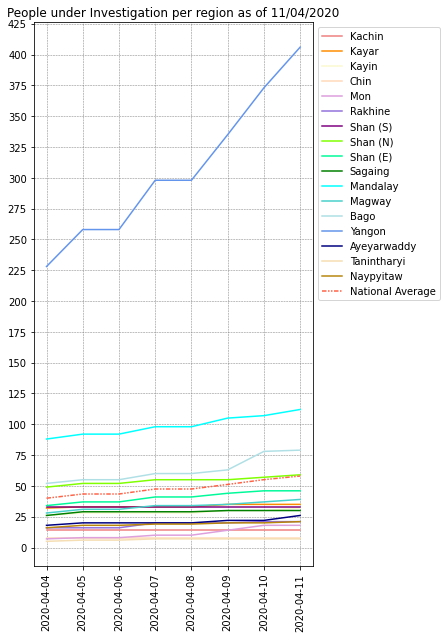

In [521]:
fig, ax = plt.subplots(figsize=(5,10))
ax.grid(linestyle='--', linewidth='0.5', color='gray')

plt.xticks(fontsize=10, rotation=90)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(25))

for i in range(0,17,1):
  plt.plot(pui_sr_df["date"],pui_sr_df[regions[i]], label=regions[i], color=color_plan[i])

plt.plot(pui_sr_df["date"],pui_sr_df["avg"], label="National Average", linestyle=(0, (3, 1, 1, 1, 1, 1)), color="tomato")

plt.title("People under Investigation per region as of "+str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d/%m/%Y")))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

pui_reg = str(pd.to_datetime("today").tz_localize("UTC").tz_convert("Asia/Yangon").strftime("%d-%m-%Y"))+"_pui_reg.svg"
plt.savefig(pui_reg, bbox_inches = "tight")
plt.show()
files.download(pui_reg)